In [2]:
#imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import (recall_score,
                            precision_score,
                            accuracy_score,
                            f1_score,
                            confusion_matrix,
                            roc_curve,
                            roc_auc_score)

import graphviz

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [3]:
#read csv
stroke_df = pd.read_csv('dataset/train.csv')
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [4]:
#converting categorical data into numbers

cat_df = stroke_df[['gender', 'ever_married','work_type', 'Residence_type','smoking_status']]
cat_df = cat_df.astype('category')
cat_df = cat_df.apply(lambda x : x.cat.codes)
cat_df.head()

#print(cat_df['smoking_status'].unique())
stroke_df[cat_df.columns] = cat_df.copy()

#stroke_df.head()

In [7]:
#decision tree

X = stroke_df.drop(['id', 'stroke'], axis=1)
y = stroke_df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

ad = DecisionTreeClassifier()
ad.fit(X_train, y_train)
y_pred_ad = ad.predict(X_test)

ad_plot = export_graphviz(ad, out_file=None,
                          feature_names=X.columns,
                          class_names=['0', '1'],
                          filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(ad_plot)
#graph.view()

In [8]:
#metrics

precision = precision_score(y_test, y_pred_ad)
recall = recall_score(y_test, y_pred_ad)
f1 = f1_score(y_test, y_pred_ad)
accuracy = accuracy_score(y_test, y_pred_ad)

print("Precisão:", precision)
print("Recall:", recall)
print("f1:", f1)
print("Acurácia:", accuracy)

Precisão: 0.18791946308724833
Recall: 0.21875
f1: 0.20216606498194947
Acurácia: 0.8662227602905569


In [11]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_ad).ravel()

print('TN:', tn)
print('FP:', fp)
print('FN:', fn)
print('TP:', tp)

recall = tp/(tp+fn)
acuracia = (tp+tn)/(tn+tp+fn+fp)

TN: 2830
FP: 93
FN: 109
TP: 29


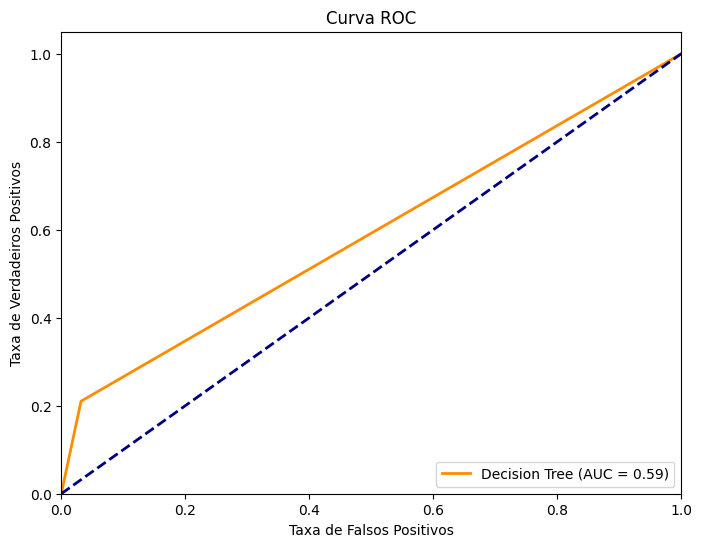

In [12]:
#curva ROC - avaliação dos classificadores

#decision tree
y_prob = ad.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = roc_auc_score(y_test, y_prob) #Área Sob a Curva ROC (AUC-ROC)

# Plote a Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Decision Tree (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()